Here I am implimenting this kernel: https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers/notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv(r"../input/train.csv", dtype = np.float32)

In [3]:
targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != "label"].values/255
features_train, features_test, targets_train, target_test = train_test_split(features_numpy, targets_numpy, test_size=0.2,random_state = 42)

In [4]:
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

In [5]:
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(target_test).type(torch.LongTensor)

In [ ]:
len(featuresTest)

In [6]:
batch_size = 100
n_iter = 10000
num_epochs = int(n_iter / (len(features_train) / batch_size))
num_epochs = int(num_epochs)


In [7]:
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

In [8]:
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

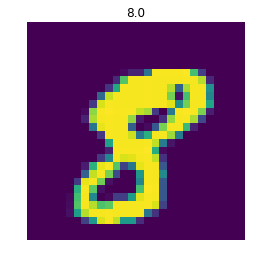

In [9]:
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [10]:
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.tanh2 = nn.Tanh()
        
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.elu3 = nn.ELU()
        
        self.fc4 = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.tanh2(out)
        out = self.fc3(out)
        out = self.elu3(out)
        out = self.fc4(out)
        return out

In [11]:
input_dim = 28*28
hidden_dim = 150
output_dim = 10

model = ANNModel(input_dim, hidden_dim, output_dim)

error = nn.CrossEntropyLoss()

learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [18]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs, labels)
        
        loss.backward()
        
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            correct = 0 
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(-1,28*28))
                
                outputs = model(test)
                
                predicted = torch.max(outputs.data, 1)[1]
                
                total += len(labels)
                
                correct += (predicted == labels).sum()
                
            accuracy = 100* correct / float(total)
            
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            print('Iteration: {} Loss: {} Accuracy: {} % '.format(count, loss.data[0], accuracy))
            

Iteration: 500 Loss: 0.01734573394060135 Accuracy: 97.05952380952381 % 
Iteration: 1000 Loss: 0.009028974920511246 Accuracy: 97.07142857142857 % 
Iteration: 1500 Loss: 0.008858810178935528 Accuracy: 96.96428571428571 % 
Iteration: 2000 Loss: 0.01577838696539402 Accuracy: 96.97619047619048 % 
Iteration: 2500 Loss: 0.014657832682132721 Accuracy: 97.1547619047619 % 
Iteration: 3000 Loss: 0.00767048355191946 Accuracy: 97.08333333333333 % 
Iteration: 3500 Loss: 0.013171362690627575 Accuracy: 97.1547619047619 % 
Iteration: 4000 Loss: 0.008804124779999256 Accuracy: 97.07142857142857 % 
Iteration: 4500 Loss: 0.009111731313169003 Accuracy: 97.10714285714286 % 
Iteration: 5000 Loss: 0.005581614561378956 Accuracy: 97.04761904761905 % 
Iteration: 5500 Loss: 0.01153732929378748 Accuracy: 97.07142857142857 % 
Iteration: 6000 Loss: 0.00911086518317461 Accuracy: 96.97619047619048 % 
Iteration: 6500 Loss: 0.008339195512235165 Accuracy: 97.02380952380952 % 
Iteration: 7000 Loss: 0.008043280802667141 Acc

In [ ]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()